In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --pre -f https://sklearn-nightly.scdn8.secure.raxcdn.com scikit-learn

Looking in links: https://sklearn-nightly.scdn8.secure.raxcdn.com


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Load in Data

In [3]:
df = pd.read_csv('beijing_master.csv')
df_gr = df.groupby('date').mean()
df_gr = df_gr.drop(['year', 'hour'], axis = 1)

In [4]:
df_gr

,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,...,WNW,WSW,AQI_PM2.5,AQI_PM10,AQI_CO,AQI_NO2,AQI_SO2,AQI_O3,AQI,weekday
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01,3.0,1.0,7.261364,13.275486,3.505375,14.341677,0.348265,0.032490,1.093182,1026.630303,...,0.018939,0.000000,23.446285,11.968818,3.957552,13.529884,5.007678,30.083737,35.388329,1.0
2013-03-02,3.0,2.0,31.526515,40.919940,11.294616,28.053480,0.772689,0.015471,0.222348,1026.601136,...,0.034091,0.060606,74.560500,33.772307,8.780553,26.109911,16.135166,14.324617,78.379442,0.0
2013-03-03,3.0,3.0,77.772727,109.344697,17.254908,37.503760,1.419104,0.011585,5.256818,1014.256061,...,0.140152,0.015152,144.025014,77.398620,16.126176,34.947023,24.430721,10.727299,144.425585,0.0
2013-03-04,3.0,4.0,23.176567,41.445940,6.819097,22.596189,0.604732,0.028184,9.626515,1017.303030,...,0.022727,0.018939,60.183106,34.758265,6.871956,20.962543,9.741567,26.096449,64.684175,1.0
2013-03-05,3.0,5.0,129.179116,158.106061,25.174703,51.026083,1.649297,0.037918,6.574621,1010.608712,...,0.041667,0.000000,187.914737,102.096521,18.742008,48.662423,34.819271,35.109718,192.124685,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-24,2.0,24.0,24.279938,37.878400,3.418476,21.716438,0.569965,0.022355,4.850379,1019.198106,...,0.200758,0.037879,64.979397,32.691370,6.476874,20.489548,4.883537,20.698901,66.482887,1.0
2017-02-25,2.0,25.0,11.770651,22.266852,2.082350,15.123112,0.390930,0.028563,7.021591,1017.010227,...,0.189394,0.071970,36.725308,20.476660,4.442383,14.267087,2.974786,30.928948,46.302496,0.0
2017-02-26,2.0,26.0,27.816106,45.149427,3.643582,24.807694,0.587603,0.020739,6.729167,1018.506818,...,0.018939,0.030303,74.424945,39.155889,6.677308,23.403485,5.205117,19.202728,74.575859,0.0


# Segregate Train and Test 

In [5]:
train = df_gr.iloc[:-365]
test = df_gr.iloc[-365:]

# Multivariate Output Target: Pollutant Outcome Information 

In [6]:
#no feature selection

In [7]:
X_train = train[['month', 'day', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM', 'fall', 'spring', 'summer', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'weekday', 'CO', 'NO2', 'SO2']]

X_test = test[['month', 'day', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM', 'fall', 'spring', 'summer', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'weekday', 'CO', 'NO2', 'SO2']]

y_train = train[['PM2.5', 'PM10','O3']]
y_test = test[['PM2.5', 'PM10','O3']]

# Set up Model for Multivariate Output Target

In [8]:
model = ExtraTreesRegressor() #regular model fit

In [9]:
model.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

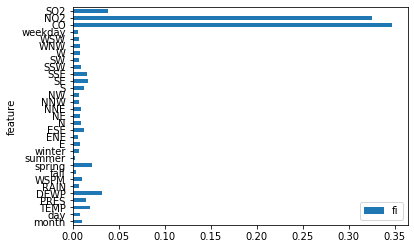

In [10]:
#plot feature importances
ft = pd.DataFrame({'fi': model.feature_importances_, 'feature': X_train.columns})

ax = ft.plot.barh(x='feature')
plt.show()

In [11]:
results = model.predict(X_test)
results = pd.DataFrame(results, columns = y_test.columns, index = test.index)


,PM2.5,PM10,O3
date,,,
2016-03-01,129.990336,155.809733,0.016690
2016-03-02,193.863627,218.103776,0.019508
2016-03-03,230.827762,261.024487,0.012090
2016-03-04,256.812300,281.476801,0.007345
2016-03-05,23.362023,69.288704,0.036099
...,...,...,...
2017-02-24,30.597964,48.308122,0.019918
2017-02-25,19.191986,37.628162,0.026730
2017-02-26,33.075098,56.449028,0.022969


In [12]:
#convert pollutant predictions to corresponding AQI preds (df_aqi) and pollutant info from y_test to AQIs (y_test_aqi)
#aqi_target, aqi_preds = max of the respective AQI columns.

from aqi_calc import compute_aqi

aqi_names = {'PM2.5': 'pm2', 'PM10': 'pm10','O3': 'o3'}

df_aqi = pd.DataFrame()
y_test_aqi = pd.DataFrame()

for i in aqi_names.keys(): 
    insert_col = 'AQI_' + i
    df_aqi[insert_col] = results[i].apply(lambda x: compute_aqi(x, aqi_names[i]))
    y_test_aqi[insert_col] = y_test[i].apply(lambda x: compute_aqi(x, aqi_names[i]))

df_aqi['AQI'] = df_aqi.max(axis = 1)
y_test_aqi['AQI'] = y_test_aqi.max(axis = 1)

aqi_target = y_test_aqi['AQI']
aqi_preds = df_aqi['AQI']

In [13]:
x = pd.DataFrame({'col1': aqi_preds, 'col2': aqi_target})


,col1,col2
date,,
2016-03-01,188.220571,178.895563
2016-03-02,243.972964,207.157224
2016-03-03,280.604089,317.209189
2016-03-04,306.026602,362.381447
2016-03-05,66.471452,175.644360
...,...,...
2017-02-24,80.710854,68.277790
2017-02-25,58.265353,38.216399
2017-02-26,85.585535,75.236513


In [14]:
#compute the RMSE of the model

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(x['col1'], x['col2'])) 

baseline_target = [np.mean(aqi_target)]*len(aqi_target)
rms_b = sqrt(mean_squared_error(aqi_target, baseline_target))

rms, rms_b

(32.97919248579948, 72.37793998897276)

Feature Selection MultiVariate Output Model

In [32]:
#run the model with some predictors dropped to test out the score

X_train = train[['month', 'TEMP',
       'PRES', 'RAIN', 
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]

X_test = test[['month', 'TEMP',
       'PRES','RAIN', 
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]

y_train = train[['PM2.5', 'PM10','O3']]

y_test = test[['PM2.5', 'PM10','O3']]




In [33]:
model_ = ExtraTreesRegressor()
model_.fit(X_train, y_train)
results_ = model_.predict(X_test)
results_ = pd.DataFrame(results_, columns = y_test.columns, index = test.index)
results_

,PM2.5,PM10,O3
date,,,
2016-03-01,116.237425,141.080021,0.011980
2016-03-02,219.385271,239.279330,0.019651
2016-03-03,250.511892,274.383494,0.010653
2016-03-04,269.282449,294.709128,0.007258
2016-03-05,14.201765,39.647439,0.033153
...,...,...,...
2017-02-24,30.623886,61.759631,0.022052
2017-02-25,22.430434,55.156315,0.028796
2017-02-26,38.802612,64.177365,0.025313


In [34]:
#convert pollutant predictions to corresponding AQI preds (df_aqi) and pollutant info from y_test to AQIs (y_test_aqi)
#aqi_target, aqi_preds = max of the respective AQI columns.

from aqi_calc import compute_aqi

aqi_names = {'PM2.5': 'pm2', 'PM10': 'pm10', 'O3': 'o3'}

df_aqi = pd.DataFrame()
y_test_aqi = pd.DataFrame()

for i in aqi_names.keys(): 
    insert_col = 'AQI_' + i
    df_aqi[insert_col] = results_[i].apply(lambda x: compute_aqi(x, aqi_names[i]))
    y_test_aqi[insert_col] = y_test[i].apply(lambda x: compute_aqi(x, aqi_names[i]))

df_aqi['AQI'] = df_aqi.max(axis = 1)
y_test_aqi['AQI'] = y_test_aqi.max(axis = 1)

aqi_target = y_test_aqi['AQI']
aqi_preds = df_aqi['AQI']

In [35]:
x_ = pd.DataFrame({'col1': aqi_preds, 'col2': aqi_target})
x_

,col1,col2
date,,
2016-03-01,180.283084,178.895563
2016-03-02,269.264683,207.157224
2016-03-03,301.009470,317.209189
2016-03-04,315.956812,362.381447
2016-03-05,46.109627,175.644360
...,...,...
2017-02-24,80.761863,68.277790
2017-02-25,64.638203,38.216399
2017-02-26,96.856546,75.236513


In [36]:
rms = sqrt(mean_squared_error(aqi_target, aqi_preds)) 

baseline_target = [np.mean(aqi_target)]*len(aqi_target)
rms_b = sqrt(mean_squared_error(aqi_target, baseline_target))

rms, rms_b

(33.00756667096332, 72.37793998897276)

In [136]:
#choose feature selected train model for tuning hyperparameters

In [37]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110, 120, 130, 140, 150],
    'max_features': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 120, 140, 160, 180, 200]
}

grid_search = GridSearchCV(estimator = model_,
                          param_grid = param_grid, 
                          cv = 3, 
                           n_jobs = -1,
                          verbose = 2)

In [39]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 48.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 51.2min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 53.9min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 56.9min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 60.2min
[Parallel(n_jobs=-1)]: Done 6912 out of 6912 | elapsed: 60.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=None,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param

In [61]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 10,
 'min_samples_leaf': 3,
 'n_estimators': 120}

In [40]:
grid_search.best_estimator_.fit(X_train, y_train)
preds = grid_search.best_estimator_.predict(X_test)

In [41]:
preds

array([[1.24451482e+02, 1.47666800e+02, 1.55873360e-02],
       [1.97385098e+02, 2.19921941e+02, 1.52195790e-02],
       [2.27872227e+02, 2.55408754e+02, 1.09652132e-02],
       ...,
       [4.46281605e+01, 7.22254112e+01, 2.71334771e-02],
       [9.65269366e+01, 1.28267370e+02, 2.41386577e-02],
       [3.08318314e+01, 6.23038305e+01, 2.80682882e-02]])

In [45]:
results_cv = pd.DataFrame(preds, columns = y_test.columns)
results_cv

,PM2.5,PM10,O3
0,124.451482,147.666800,0.015587
1,197.385098,219.921941,0.015220
2,227.872227,255.408754,0.010965
3,242.549629,267.357268,0.007477
4,16.925881,49.645380,0.031158
...,...,...,...
360,36.529660,63.182011,0.022160
361,26.938533,62.394126,0.027502
362,44.628161,72.225411,0.027133
363,96.526937,128.267370,0.024139


In [52]:
#convert pollutant predictions to corresponding AQI preds (df_aqi) and pollutant info from y_test to AQIs (y_test_aqi)
#aqi_target, aqi_preds = max of the respective AQI columns.

df_aqi = pd.DataFrame()
y_test_aqi = pd.DataFrame()

for i in aqi_names.keys(): 
    insert_col = 'AQI_' + i
    df_aqi[insert_col] = results_cv[i].apply(lambda x: compute_aqi(x, aqi_names[i]))
    y_test_aqi[insert_col] = y_test[i].apply(lambda x: compute_aqi(x, aqi_names[i]))

df_aqi['AQI'] = df_aqi.max(axis = 1)
y_test_aqi['AQI'] = y_test_aqi.max(axis = 1)

aqi_target = y_test_aqi['AQI']
aqi_preds = df_aqi['AQI']
aqi_preds.index = aqi_target.index

In [59]:
x_ = pd.DataFrame({'preds': aqi_preds, 'target': aqi_target})
x_

,preds,target
date,,
2016-03-01,185.023823,178.895563
2016-03-02,247.462710,207.157224
2016-03-03,277.675180,317.209189
2016-03-04,292.220353,362.381447
2016-03-05,53.805951,175.644360
...,...,...
2017-02-24,92.383669,68.277790
2017-02-25,73.509563,38.216399
2017-02-26,109.123689,75.236513


In [60]:
rms = sqrt(mean_squared_error(aqi_target, aqi_preds)) 
baseline_target = [np.mean(aqi_target)]*len(aqi_target)
rms_b = sqrt(mean_squared_error(aqi_target, baseline_target))
rms, rms_b

(35.50503194487102, 72.37793998897276)

# Univariate Output Target: AQI Outcome Information 

# RandomForests

In [130]:
X_train = train[['month', 'day', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM', 'fall', 'spring', 'summer', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'weekday', 'CO', 'NO2', 'SO2']]

X_test = test[['month', 'day', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM', 'fall', 'spring', 'summer', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'weekday', 'CO', 'NO2', 'SO2']]


In [131]:
# # Create a pipeline
# pipe = Pipeline([('regressor', RandomForestRegressor())])

# # Create space of candidate learning algorithms and their hyperparameters
# search_space = [{'regressor': [LogisticRegression()],
#                  'regressor__penalty': ['l1', 'l2'],
#                  'classifier__C': np.logspace(0, 4, 10)},
#                 {'classifier': [RandomForestClassifier()],
#                  'classifier__n_estimators': [10, 100, 1000],
#                  'classifier__max_features': [1, 2, 3]}]

In [132]:
y_train = train['AQI']
y_test = test['AQI']

In [133]:
#all features included for simple RF model

In [134]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

baseline_target = [np.mean(y_test)]*len(y_test)
rms_b = sqrt(mean_squared_error(y_test, baseline_target))
rms = sqrt(mean_squared_error(preds, y_test))
rms, rms_b

(25.778081980491777, 70.55302731901466)

In [136]:
rf_df = pd.DataFrame({'preds': preds, 'target': y_test})
rf_df.to_csv('random_forest_ts.csv')

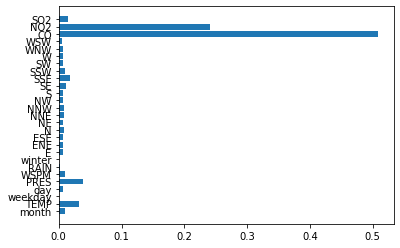

In [76]:
plt.barh(X_train.columns, rf.feature_importances_)
plt.show()


In [73]:
#feature selection on simple RF model

In [83]:
X_train = train[['month',  'TEMP', 'weekday', 'day',
       'PRES', 'WSPM', 'RAIN', 'winter', 
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]

X_test = test[['month', 'TEMP', 'weekday', 'day',
       'PRES', 'WSPM', 'RAIN', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]

rf_f = RandomForestRegressor()
rf_f.fit(X_train, y_train)
preds = rf_f.predict(X_test)

baseline_target = [np.mean(y_train[-365:])]*len(y_train[-365:])
rms_b = sqrt(mean_squared_error(y_test, baseline_target))
rms = sqrt(mean_squared_error(preds, y_test))
rms, rms_b

(26.04892415063717, 70.7397424556771)

In [89]:
#GridSearchCV on RF model without features selected
X_train = train[['month', 'day', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM', 'fall', 'spring', 'summer', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'weekday', 'CO', 'NO2', 'SO2']]

X_test = test[['month', 'day', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM', 'fall', 'spring', 'summer', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'weekday', 'CO', 'NO2', 'SO2']]

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110, 120, 130, 140, 150],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 120, 140, 160, 180, 200]
}

grid_search = GridSearchCV(estimator = rf,
                          param_grid = param_grid, 
                          cv = 3, 
                           n_jobs = -1,
                          verbose = 2)

grid_search.fit(X_train, y_train)


grid_search.best_estimator_.fit(X_train, y_train)
preds = grid_search.best_estimator_.predict(X_test)


baseline_target = [np.mean(y_train[-365:])]*len(y_train[-365:])
rms_b = sqrt(mean_squared_error(y_test, baseline_target))
rms = sqrt(mean_squared_error(preds, y_test))
rms, rms_b

print(rms, rms_b, grid_search.best_params_)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:  9.7min finished


{'bootstrap': False, 'max_depth': 140, 'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 100}


In [90]:
rms, rms_b

(29.775243096123344, 70.7397424556771)

In [94]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

baseline_target = [np.mean(y_test)]*len(y_test)
rms_b = sqrt(mean_squared_error(y_test, baseline_target))
rms = sqrt(mean_squared_error(preds, y_test))
rms, rms_b

(25.842043396102117, 70.55302731901466)

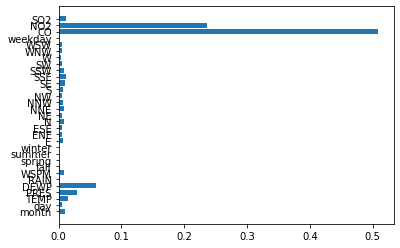

In [68]:
model.feature_importances_

plt.barh(X_train.columns, model.feature_importances_)
plt.show()

In [69]:
X_train = train[['month',  'TEMP', 'weekday', 'day',
       'PRES', 'WSPM', 'RAIN', 'winter', 
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]

X_test = test[['month', 'TEMP', 'weekday', 'day',
       'PRES', 'WSPM', 'RAIN', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]

In [70]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)



In [71]:
baseline_target = [np.mean(y_test)]*len(y_test)
rms_b = sqrt(mean_squared_error(y_test, baseline_target))
rms = sqrt(mean_squared_error(preds, y_test))
rms, rms_b

(26.086448373307878, 70.55302731901466)

Gradient Boosting Regressor

In [96]:
#no feature selection. Simple gradient boosting regressor.

In [97]:
X_train = train[['month', 'day', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM', 'fall', 'spring', 'summer', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'weekday', 'CO', 'NO2', 'SO2']]

X_test = test[['month', 'day', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'WSPM', 'fall', 'spring', 'summer', 'winter',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'weekday', 'CO', 'NO2', 'SO2']]

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
preds = gb.predict(X_test)

In [98]:
baseline_target = [np.mean(y_test)]*len(y_test)
rms_b = sqrt(mean_squared_error(y_test, baseline_target))
rms = sqrt(mean_squared_error(preds, y_test))
rms, rms_b

(26.20625430893963, 70.55302731901466)

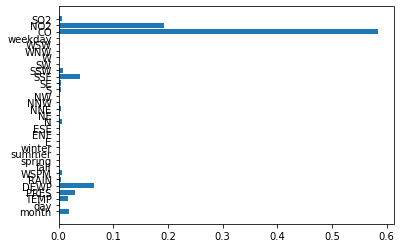

In [897]:
plt.barh(X_train.columns, model.feature_importances_)
plt.show()

In [99]:
#feature selection for GradientBoosting

X_train = train[['month',  'TEMP','weekday',
       'PRES', 'WSPM', 'RAIN', 'winter', 'DEWP',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]

X_test = test[['month', 'TEMP','weekday',
       'PRES', 'WSPM', 'RAIN', 'winter', 'DEWP',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]

gb_f = GradientBoostingRegressor()
gb_f.fit(X_train, y_train)
preds = gb_f.predict(X_test)


In [100]:
baseline_target = [np.mean(y_test)]*len(y_test)
rms_b = sqrt(mean_squared_error(y_test, baseline_target))
rms = sqrt(mean_squared_error(preds, y_test))
rms, rms_b

(26.022892045955984, 70.55302731901466)

In [102]:
#GridSearch CV for feature selected GradientBoost. 


X_train = train[['month',  'TEMP','weekday',
       'PRES', 'WSPM', 'RAIN', 'winter', 'DEWP',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]

X_test = test[['month', 'TEMP','weekday',
       'PRES', 'WSPM', 'RAIN', 'winter', 'DEWP',
       'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW', 'CO', 'NO2', 'SO2']]


param_grid = {
    'max_depth': [80, 90, 100, 110, 120, 130, 140, 150],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 120, 140, 160, 180, 200]
}

grid_search = GridSearchCV(estimator = gb_f,
                          param_grid = param_grid, 
                          cv = 3, 
                           n_jobs = -1,
                          verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [103]:
grid_search.best_params_

{'max_depth': 110,
 'max_features': 5,
 'min_samples_leaf': 4,
 'n_estimators': 180}

In [126]:
grid_search.best_estimator_.fit(X_train, y_train)
preds = grid_search.best_estimator_.predict(X_test)


baseline_target = [np.mean(y_train[-365:])]*len(y_train[-365:])
rms_b = sqrt(mean_squared_error(y_test, baseline_target))
rms = sqrt(mean_squared_error(preds, y_test))
rms, rms_b

print(rms, rms_b, grid_search.best_params_)

27.552018511231 70.7397424556771 {'max_depth': 110, 'max_features': 5, 'min_samples_leaf': 4, 'n_estimators': 180}


In [129]:
time_series_df = pd.DataFrame({'preds': preds, 'target': y_test})
time_series_df.to_csv('supervised_timeseries.csv')